# Data 311 Lab 2
## Alex Isbill

## Part 2: Additional Analysis
> ### Question: Have the summers in Boulder, CO been getting hotter over the last 10 years?
**Motivation**: People always say the the summers are getting hotter in my hometown and that temperature records seem to always be getting broken, but on average are the summers really getting hotter?
## Approach:
1. Gather the relvant data:
    * Filter for daily reports
    * Look at the max temperature column
    * Filter for the summer dates for each year
2. For each year:
    * Take the average of the max temperatures for that Summer
    * Add value to a dictionary
3. Analysis:
    * Create a dataframe with the average high temperatures for each of the last 10 summers
    * Plot the data and look for trends in order to determine if the summers have definitively been getting hotter.

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None

bol = pd.read_csv("boulder_10year.csv", low_memory=False)

### Get the Relevant Dataframe
* Look at only daily reports
* We only need the date and the max temp columns
    * According to the documentation, dry bulb temp is commonly used for standard air temperature reported
* Convert to datetime format

In [28]:
bol = bol[bol["REPORT_TYPE"].str.contains("SOD")]
bol_rel = bol[["DATE", "DailyMaximumDryBulbTemperature"]]
bol_rel.rename(columns = {"DailyMaximumDryBulbTemperature" : "MAXTEMP"},inplace=True)
bol_rel["DATE"] = pd.to_datetime(bol_rel["DATE"])

### Find the average high temp for each summer
* Loop through the years and create a mask to filter for only the days in the summer
* Take the average of the high temps for that year and add it to a dictionary

In [17]:
maxTemps = {}
years = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]

for i in range(10):
    mask = (bol_rel["DATE"] > str(years[i]) + "-06-21") & (bol_rel["DATE"] < str(years[i]) + "-09-22")
    summer = bol_rel[mask]
    avg = summer["MAXTEMP"].mean()
    maxTemps[years[i]] = avg

### Put into dataframe and look at results
* Convert the dictionary into a data frame with columns of year and average summer high temperature
* Plot the result to see if we see a yearly trend

,Year,Average Summer High Temperature
0,2011,65.532609
1,2012,66.774194
2,2013,65.292135
3,2014,63.554348
4,2015,65.500000
5,2016,66.532609
6,2017,65.633333
7,2018,67.369565
8,2019,67.000000
9,2020,67.741935


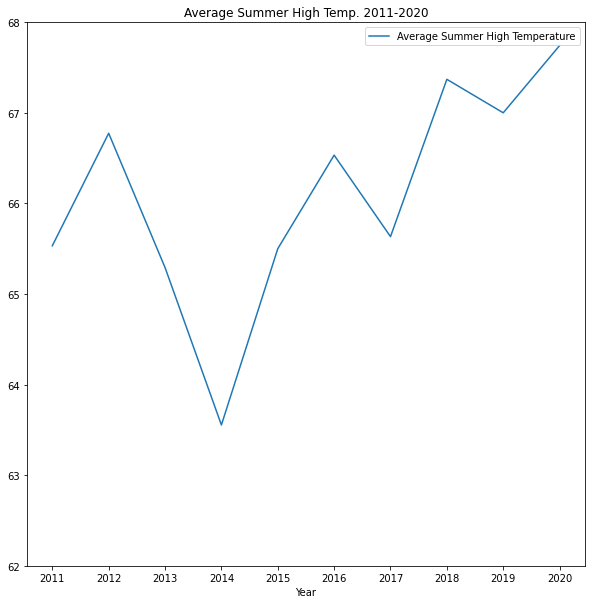

In [33]:
maxDF = pd.DataFrame.from_dict(maxTemps, orient="index", columns = ["Average Summer High Temperature"])
maxDF.index.name = "Year"
maxDF.reset_index(inplace=True)
maxDF.plot.line(x="Year", y="Average Summer High Temperature", title="Average Summer High Temp. 2011-2020",
                xticks=maxDF["Year"], ylim= (62,68), figsize=(10,10))
maxDF


In [37]:
# To examine the upward trend after 2014. we can find the average temp change over the last 6 years
avgInc = (maxDF["Average Summer High Temperature"].max() - maxDF["Average Summer High Temperature"].min())/6
avgInc

0.6979312762973345

## Conclusion
* While the data stays between a small range 63 and 68 degrees, we see a clear upward trend after 2014.
>**We can say that since 2014, the average summer high temperature in Boulder, CO has increased by an average of 0.70 degrees per year.**